In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
%matplotlib inline

In [20]:
#df = pd.read_csv('https://aineistot.liikennevirasto.fi/lam/rawdata/2018/[ELY]/lamraw_[lam_id]_[yearshort]_[day_number].csv')
df = pd.read_csv('cleaned_dataset.csv')
df = df.fillna(0)

In [21]:
df.head(20)

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_14-15,KLO_15-16,KLO_16-17,KLO_17-18,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00
0,168,Askisto,2013/12/01,1,11 HA-PA,123.0,124.0,80.0,71.0,123.0,...,1288.0,1271.0,1210.0,1143.0,880.0,670.0,471.0,292.0,222.0,94.0
1,168,Askisto,2013/12/01,1,12 KAIP,2.0,1.0,1.0,1.0,0.0,...,13.0,12.0,13.0,8.0,5.0,8.0,3.0,5.0,1.0,8.0
2,168,Askisto,2013/12/01,1,13 Linja-autot,1.0,2.0,1.0,1.0,0.0,...,4.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0
3,168,Askisto,2013/12/01,1,14 KAPP,0.0,0.0,0.0,0.0,1.0,...,9.0,2.0,3.0,4.0,3.0,8.0,16.0,12.0,19.0,6.0
4,168,Askisto,2013/12/01,1,15 KATP,0.0,0.0,0.0,0.0,1.0,...,6.0,12.0,3.0,8.0,5.0,6.0,7.0,9.0,12.0,7.0
5,168,Askisto,2013/12/01,1,16 HA + PK,0.0,1.0,0.0,0.0,0.0,...,28.0,15.0,25.0,22.0,9.0,7.0,3.0,3.0,1.0,1.0
6,168,Askisto,2013/12/01,1,17 HA + AV,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,168,Askisto,2013/12/01,2,11 HA-PA,198.0,114.0,91.0,95.0,61.0,...,1201.0,1275.0,1265.0,1150.0,1059.0,786.0,664.0,388.0,212.0,211.0
8,168,Askisto,2013/12/01,2,12 KAIP,5.0,5.0,0.0,1.0,0.0,...,8.0,8.0,3.0,6.0,4.0,7.0,4.0,9.0,3.0,2.0
9,168,Askisto,2013/12/01,2,13 Linja-autot,3.0,2.0,1.0,1.0,0.0,...,3.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,3.0,2.0


In [53]:
def get_weekday(date_str):
    date = parser.parse(date_str, dayfirst=True)
    weekday = date.weekday()
    return weekday

def get_week(date_str):
    date = parser.parse(date_str, dayfirst=True)
    week = date.isocalendar()[1]
    return week

def get_week_and_year(date_str):
    date = parser.parse(date_str, dayfirst=True)
    year = date.year
    week = date.isocalendar()[1]
    return "{}/{}".format(week, year)

def get_hour_cols():
    hour_cols = ["KLO_{:02}-{:02}".format(i, i+1) for i in range(24)]
    hour_cols[-1] = "KLO_23-00"
    return hour_cols

def get_sum(row):
    return row[get_hour_cols()].sum()
    s = 0
    for col in get_hour_cols():
        value = row[col]
        if isinstance(value, int):
            s += value
        elif isinstance(value, str) and value.isdigit():
            s += int(value)
    return s

In [54]:
# add calculated fields
df["Viikonpäivä"] = df.Päivä.apply(get_weekday)
df["Viikko"] = df.Päivä.apply(get_week)
df["Viikko/vuosi"] = df.Päivä.apply(get_week_and_year)
df["SUM"] = df.apply(lambda row: get_sum(row), axis=1)

In [55]:
#df = df[(df.Ajoneuvoluokka == "11 HA-PA")]

In [56]:
df.head(20)
df.columns

Index(['Mittauspiste', 'Sijainti', 'Päivä', 'Suuntakoodi', 'Ajoneuvoluokka',
       'KLO_00-01', 'KLO_01-02', 'KLO_02-03', 'KLO_03-04', 'KLO_04-05',
       'KLO_05-06', 'KLO_06-07', 'KLO_07-08', 'KLO_08-09', 'KLO_09-10',
       'KLO_10-11', 'KLO_11-12', 'KLO_12-13', 'KLO_13-14', 'KLO_14-15',
       'KLO_15-16', 'KLO_16-17', 'KLO_17-18', 'KLO_18-19', 'KLO_19-20',
       'KLO_20-21', 'KLO_21-22', 'KLO_22-23', 'KLO_23-00', 'Viikonpäivä',
       'Viikko', 'SUM', 'Viikko/vuosi'],
      dtype='object')

In [57]:
ha = df[(df.Ajoneuvoluokka == "11 HA-PA") & (df.Suuntakoodi == 1)]

In [58]:
ha

,Mittauspiste,Sijainti,Päivä,Suuntakoodi,Ajoneuvoluokka,KLO_00-01,KLO_01-02,KLO_02-03,KLO_03-04,KLO_04-05,...,KLO_18-19,KLO_19-20,KLO_20-21,KLO_21-22,KLO_22-23,KLO_23-00,Viikonpäivä,Viikko,SUM,Viikko/vuosi
0,168,Askisto,2013/12/01,1,11 HA-PA,123.0,124.0,80.0,71.0,123.0,...,880.0,670.0,471.0,292.0,222.0,94.0,5,2,12588.0,2/2013
14,168,Askisto,2013/12/02,1,11 HA-PA,57.0,38.0,22.0,43.0,105.0,...,814.0,601.0,412.0,347.0,204.0,93.0,1,7,21501.0,7/2013
28,168,Askisto,2013/12/03,1,11 HA-PA,38.0,29.0,15.0,42.0,92.0,...,866.0,608.0,455.0,346.0,221.0,106.0,1,11,21571.0,11/2013
42,168,Askisto,2013/12/04,1,11 HA-PA,43.0,30.0,25.0,45.0,117.0,...,997.0,617.0,526.0,409.0,230.0,117.0,4,15,22572.0,15/2013
56,168,Askisto,2013/12/05,1,11 HA-PA,46.0,42.0,30.0,48.0,138.0,...,1016.0,701.0,535.0,385.0,248.0,170.0,6,19,23558.0,19/2013
70,168,Askisto,2013/12/06,1,11 HA-PA,123.0,73.0,61.0,71.0,109.0,...,528.0,443.0,345.0,306.0,269.0,166.0,2,24,10502.0,24/2013
84,168,Askisto,2013/12/07,1,11 HA-PA,116.0,70.0,57.0,52.0,98.0,...,619.0,516.0,428.0,290.0,264.0,159.0,4,28,12823.0,28/2013
98,168,Askisto,2013/12/08,1,11 HA-PA,106.0,98.0,73.0,74.0,116.0,...,915.0,630.0,485.0,366.0,208.0,92.0,0,33,12737.0,33/2013
112,168,Askisto,2013/12/09,1,11 HA-PA,51.0,40.0,15.0,42.0,105.0,...,821.0,544.0,488.0,337.0,221.0,113.0,3,37,21696.0,37/2013
126,168,Askisto,2013/12/10,1,11 HA-PA,53.0,35.0,18.0,32.0,112.0,...,840.0,561.0,431.0,344.0,226.0,106.0,5,41,21250.0,41/2013


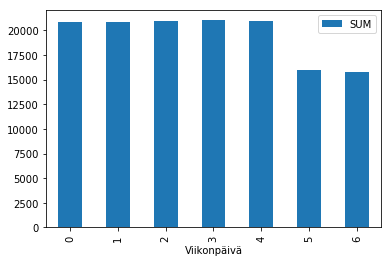

In [59]:
# average volume per weekday
avg_weekday = ha[["Viikonpäivä", "SUM"]].groupby(["Viikonpäivä"]).agg('mean').reset_index()
avg_weekday.plot(x="Viikonpäivä", y="SUM", kind="bar")

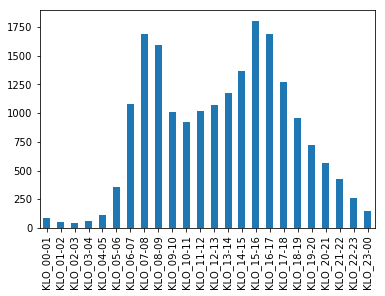

In [60]:
# average volume per clock time
fig, ax = plt.subplots(figsize=(20, 10))
avg_time = ha[get_hour_cols()].mean(axis=0)
avg_time
avg_time.plot(kind="bar")

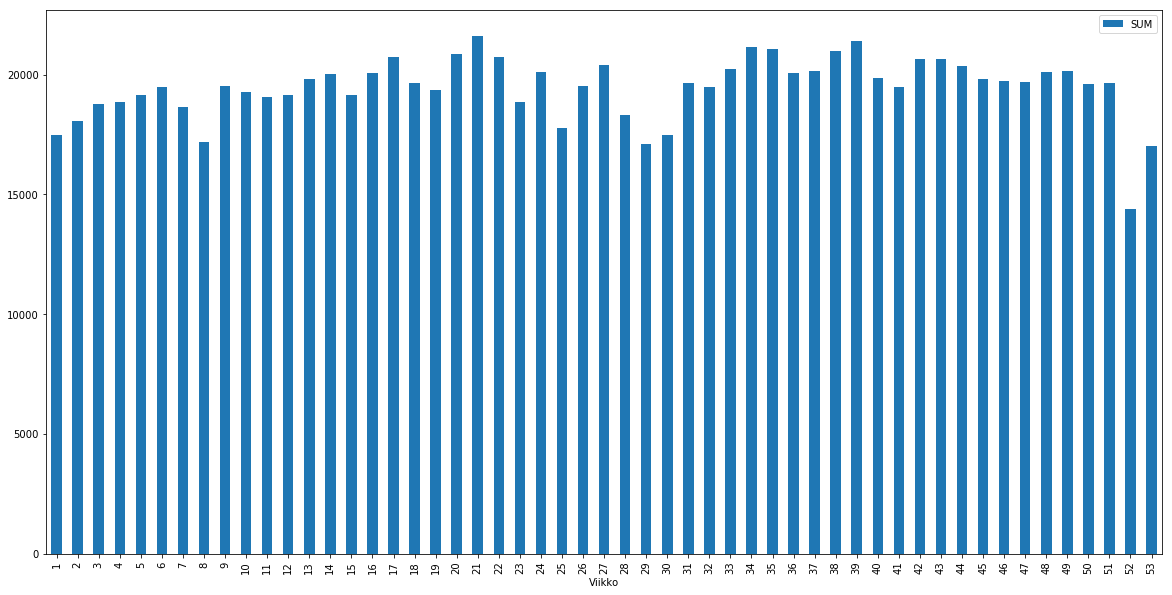

In [70]:
# average volume per week
fig, ax = plt.subplots(figsize=(20, 10))
avg_week = ha[["Viikko", "SUM"]].groupby(["Viikko"]).agg('mean').reset_index()
avg_week.plot(x="Viikko", y="SUM", kind="bar", ax=ax)

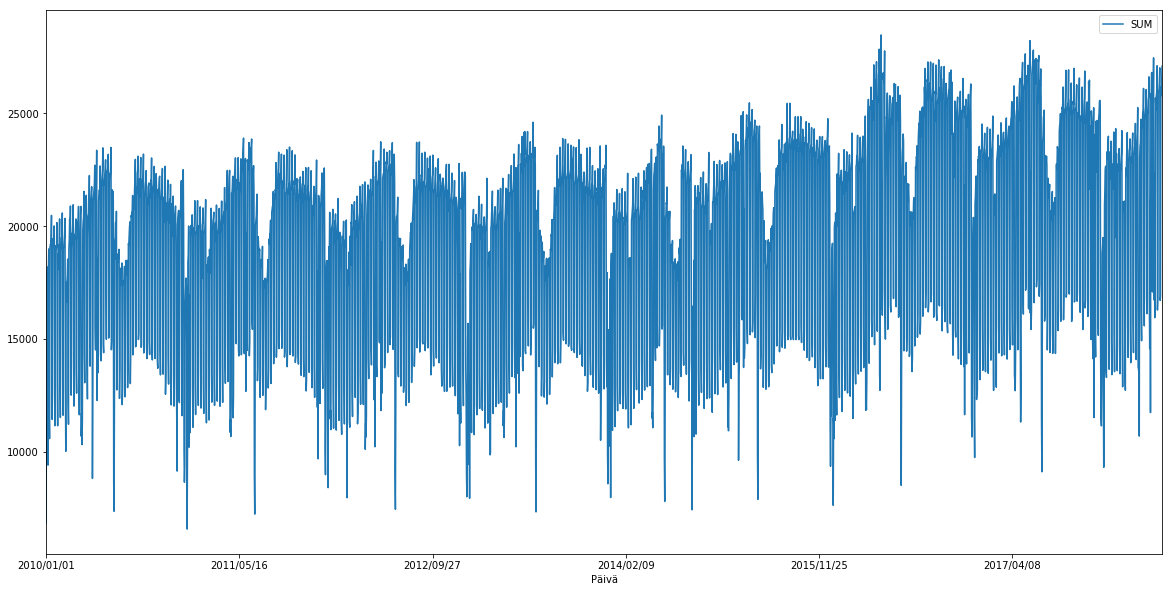

In [68]:
# average volume per date
fig, ax = plt.subplots(figsize=(20, 10))
avg_week = ha[["Päivä", "SUM"]].groupby(["Päivä"]).agg('mean').reset_index()
avg_week.plot(x="Päivä", y="SUM", kind="line", ax=ax)

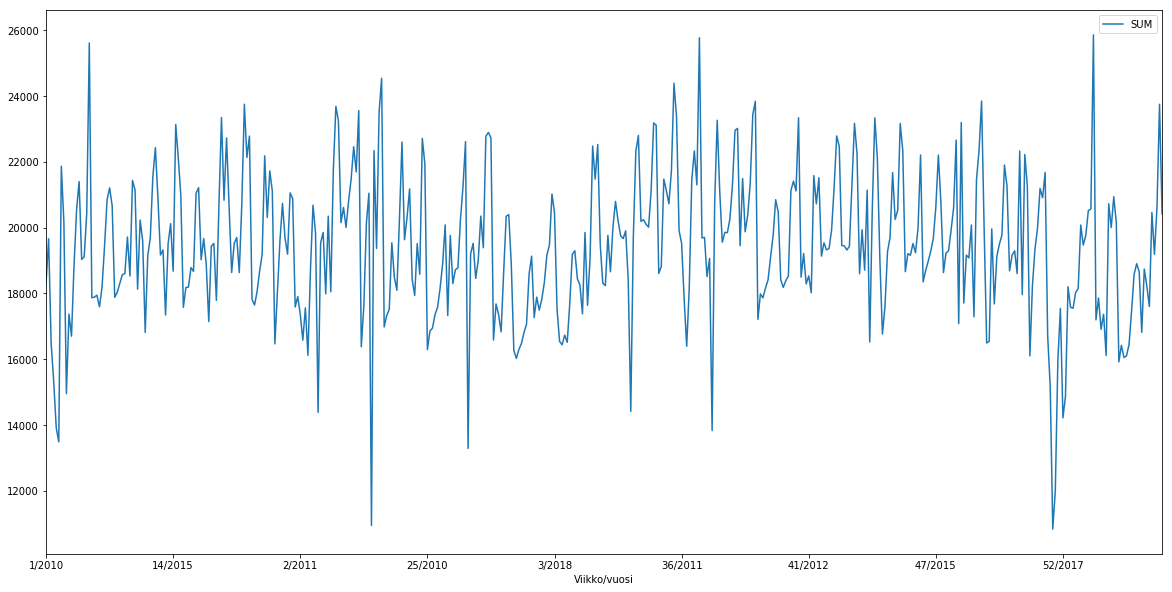

In [67]:
# average volume per week of a year
fig, ax = plt.subplots(figsize=(20, 10))
avg_week_year = ha[["Viikko/vuosi", "SUM"]].groupby(["Viikko/vuosi"]).agg('mean').reset_index()
avg_week_year.plot(x="Viikko/vuosi", y="SUM", kind="line", ax=ax)